## Visualization: Training Time vs CPU Count (DDP)

This visualization represents the relationship between the number of CPUs and the training time for a model trained using **Distributed Data Parallel (DDP)** in PyTorch. The graph highlights how increasing the number of CPUs reduces the training time, demonstrating the efficiency of parallelized training using DDP.

### Key Insights:
1. **Training Time Reduction**: 
   - The training time decreases significantly as the number of CPUs increases. This is due to the parallel nature of DDP, which distributes the workload across multiple processes.
   - However, there may be diminishing returns or slight variations as the CPU count increases, which could be attributed to factors like communication overhead between processes.

2. **Data Representation**:
   - **X-axis**: Represents the number of CPUs used during training.
   - **Y-axis**: Represents the total training time in seconds. Each data point is also annotated with the training time in the format `minutes:seconds`.

3. **Annotations**:
   - Each data point on the graph is labeled with the corresponding training time to make the trend easier to interpret.

### About Distributed Data Parallel (DDP):
DDP is a popular training paradigm in PyTorch designed for high-performance model training on multi-GPU or multi-CPU systems. It works by:
- Splitting the input data across multiple processes.
- Each process trains a replica of the model on its subset of data.
- Synchronizing gradients across all processes to ensure the model updates are consistent.

### Purpose of the Visualization:
This graph provides a clear visual representation of how DDP scales with the number of CPUs, helping evaluate the performance improvements and identify the optimal CPU configuration for efficient training.

By analyzing this graph, researchers and developers can:
- Optimize their system resource allocation for faster training.
- Identify the CPU configuration that balances speed and resource usage effectively.


In [1]:
import os
import re
import pandas as pd

# List of uploaded files
file_paths = [
    'data_parallel/logs/training_8CPUs_20241124_012337.log',
    'data_parallel/logs/training_8CPUs_20241124_014433.log',
    'data_parallel/logs/training_12CPUs_20241124_063603.log',
    'data_parallel/logs/training_16CPUs_20241124_095036.log',
    'data_parallel/logs/training_16CPUs_20241124_144243.log',
    'data_parallel/logs/training_20CPUs_20241124_122740.log',
    'data_parallel/logs/training_24CPUs_20241124_145117.log',
    'data_parallel/logs/training_28CPUs_20241124_170712.log'
]

# Regex pattern to extract CPU count and training time in seconds
cpu_pattern = re.compile(r"World size: (\d+)")
time_pattern = re.compile(r"Time Taken for Training: .*?([\d.]+) seconds")

# Dataframe to store extracted information
data = []

for file_path in file_paths:
    with open(file_path, 'r') as file:
        content = file.read()
        # Extract CPU count
        cpu_match = cpu_pattern.search(content)
        cpu_count = int(cpu_match.group(1)) if cpu_match else None
        # Extract training time
        time_match = time_pattern.search(content)
        training_time = float(time_match.group(1)) if time_match else None
        # Append to data if both metrics are found
        if cpu_count and training_time:
            data.append({'CPU Count': cpu_count, 'Training Time (s)': training_time})

# Create a dataframe from the extracted data
df = pd.DataFrame(data)

# Sort by CPU count for better visualization
df = df.sort_values(by='CPU Count')

# Display the dataframe to the user
df.to_csv('dataset/output.csv', index=False)


### Training Time vs CPU Count (DDP)
This graph illustrates the effect of increasing CPU count on training time for Distributed Data Parallel (DDP) training. Training time decreases as CPU count increases, reflecting the efficiency of DDP in leveraging parallelism. Each point is annotated with the training time in minutes:seconds format for clarity.


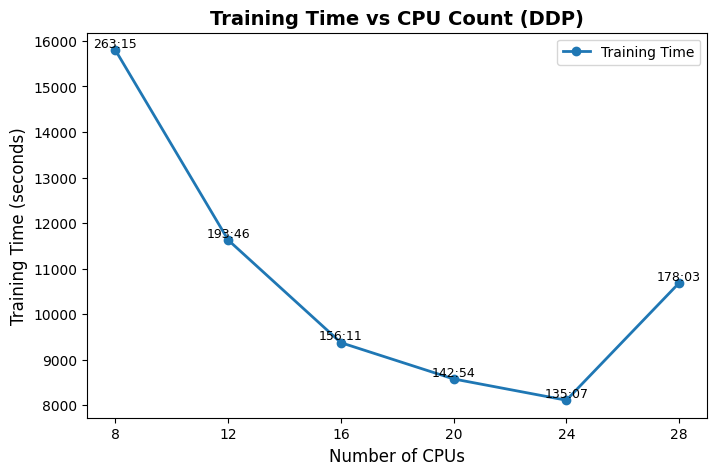

In [2]:
import matplotlib.pyplot as plt

# Ensure only the minimum training time is kept for each CPU count
df_min = df.groupby('CPU Count', as_index=False).min()

# Convert seconds to minutes:seconds format for y-axis and annotations
df_min['Training Time (min:sec)'] = df_min['Training Time (s)'].apply(
    lambda x: f"{int(x // 60)}:{int(x % 60):02d}"
)

# Plotting the data
plt.figure(figsize=(8, 5))  # Reduced image size
plt.plot(df_min['CPU Count'], df_min['Training Time (s)'], marker='o', linestyle='-', linewidth=2, markersize=6)

# Enhancing the appearance
plt.title('Training Time vs CPU Count (DDP)', fontsize=14, fontweight='bold')
plt.xlabel('Number of CPUs', fontsize=12)
plt.ylabel('Training Time (seconds)', fontsize=12)
plt.xticks(df_min['CPU Count'], fontsize=10)
plt.yticks(fontsize=10)

# Annotating data points with minutes:seconds format
for x, y, label in zip(df_min['CPU Count'], df_min['Training Time (s)'], df_min['Training Time (min:sec)']):
    plt.text(x, y, label, fontsize=9, ha='center', va='bottom')

# Adding a legend
plt.legend(['Training Time'], loc='upper right', fontsize=10)

# Save and show the plot without grid lines
plt.show()


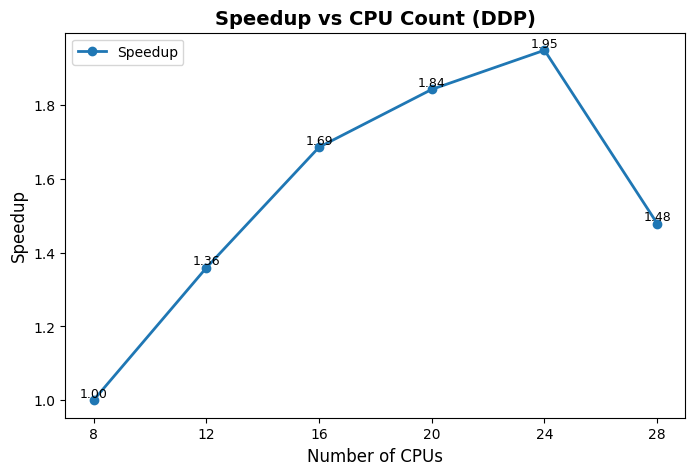

In [3]:
# Baseline training time for 8 CPUs
baseline_time = df_min.loc[df_min['CPU Count'] == 8, 'Training Time (s)'].values[0]

# Calculating speedup and efficiency
df_min['Speedup'] = baseline_time / df_min['Training Time (s)']
df_min['Efficiency'] = df_min['Speedup'] / df_min['CPU Count']

# Plotting Speedup
plt.figure(figsize=(8, 5))  # Reduced image size
plt.plot(df_min['CPU Count'], df_min['Speedup'], marker='o', linestyle='-', linewidth=2, markersize=6)

plt.title('Speedup vs CPU Count (DDP)', fontsize=14, fontweight='bold')
plt.xlabel('Number of CPUs', fontsize=12)
plt.ylabel('Speedup', fontsize=12)
plt.xticks(df_min['CPU Count'], fontsize=10)
plt.yticks(fontsize=10)

# Annotating Speedup
for x, y in zip(df_min['CPU Count'], df_min['Speedup']):
    plt.text(x, y, f"{y:.2f}", fontsize=9, ha='center', va='bottom')

plt.legend(['Speedup'], loc='upper left', fontsize=10)
plt.show()

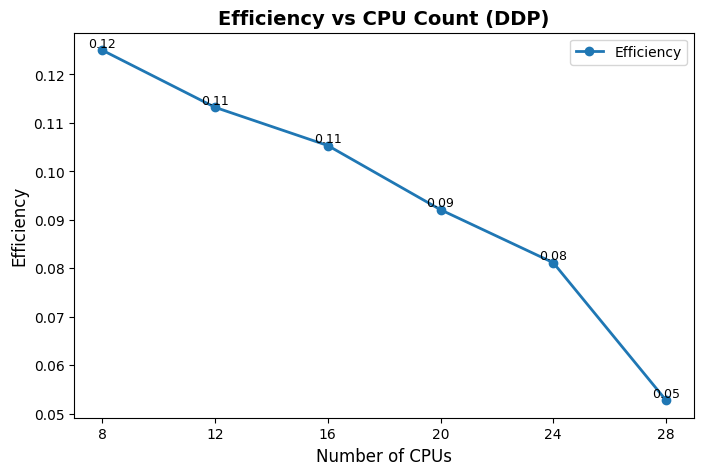

In [4]:
# Plotting Efficiency
plt.figure(figsize=(8, 5))  # Reduced image size
plt.plot(df_min['CPU Count'], df_min['Efficiency'], marker='o', linestyle='-', linewidth=2, markersize=6)

plt.title('Efficiency vs CPU Count (DDP)', fontsize=14, fontweight='bold')
plt.xlabel('Number of CPUs', fontsize=12)
plt.ylabel('Efficiency', fontsize=12)
plt.xticks(df_min['CPU Count'], fontsize=10)
plt.yticks(fontsize=10)

# Annotating Efficiency
for x, y in zip(df_min['CPU Count'], df_min['Efficiency']):
    plt.text(x, y, f"{y:.2f}", fontsize=9, ha='center', va='bottom')

plt.legend(['Efficiency'], loc='upper right', fontsize=10)
plt.show()

# Training Time vs CPU Count (DDP + Model Parallel)

This graph visualizes the relationship between the number of CPUs and the training time for a model trained using **Distributed Data Parallel (DDP) combined with Model Parallel** techniques. The training time is displayed on the y-axis in `minutes:seconds` format for clarity, while the x-axis represents the number of CPUs used in training.

## Key Observations:
1. **Training Time Reduction**:
   - As the number of CPUs increases, the training time generally decreases, showcasing the efficiency of parallelization.
   - For example, moving from 8 CPUs to 12 CPUs significantly reduces the training time.

2. **Variations in Training Time**:
   - Some inconsistencies, such as the spike at 20 CPUs, may be caused by additional overhead introduced by synchronization or communication between processes in the combined DDP and Model Parallel setup.

3. **Annotations**:
   - Each data point is annotated with the exact training time in `minutes:seconds` format for better insight into performance.

## Graph Components:
- **X-axis**: Number of CPUs used during training.
- **Y-axis**: Training time in `minutes:seconds` format for a more user-friendly representation.
- **Line Plot**: Represents the trend of training time as the CPU count changes.

## Performance Evaluation:
This graph is useful for understanding the scalability and performance trade-offs of combining **Distributed Data Parallel (DDP)** with **Model Parallel** training strategies. While increasing CPUs generally reduces training time, certain configurations may introduce communication overhead, leading to unexpected variations.



In [5]:
import os
import re
import pandas as pd

# List of file paths for DDP and Model Parallel training
file_paths_mp = [
    'data_and_model_parallel/logs/training_8CPUs_20241124_013929.log',
    'data_and_model_parallel/logs/training_12CPUs_20241124_054905.log',
    'data_and_model_parallel/logs/training_16CPUs_20241124_090138.log',
    'data_and_model_parallel/logs/training_20CPUs_20241124_115935.log',
    'data_and_model_parallel/logs/training_24CPUs_20241124_154626.log',
    'data_and_model_parallel/logs/training_28CPUs_20241124_185107.log'
]

# Regex pattern to extract CPU count and training time in seconds
cpu_pattern = re.compile(r"World size: (\d+)")
time_pattern = re.compile(r"Time Taken for Training: .*?([\d.]+) seconds")

# Extract data from log files
data_mp = []
for file_path in file_paths_mp:
    try:
        with open(file_path, 'r') as file:
            content = file.read()
            # Extract CPU count
            cpu_match = cpu_pattern.search(content)
            cpu_count = int(cpu_match.group(1)) if cpu_match else None
            # Extract training time
            time_match = time_pattern.search(content)
            training_time = float(time_match.group(1)) if time_match else None
            # Append to data if both metrics are found
            if cpu_count and training_time:
                data_mp.append({'CPU Count': cpu_count, 'Training Time (s)': training_time})
    except FileNotFoundError:
        print(f"File not found: {file_path}")
    except Exception as e:
        print(f"Error processing {file_path}: {e}")

# Create a DataFrame from the extracted data
df_mp = pd.DataFrame(data_mp)

# Sort the DataFrame by CPU count for easier visualization
df_mp = df_mp.sort_values(by='CPU Count')

# Save the extracted data to a CSV file
df_mp.to_csv('dataset/output_ddp_model_parallel.csv', index=False)
print("Data successfully extracted and saved to output_ddp_model_parallel.csv")


Data successfully extracted and saved to output_ddp_model_parallel.csv


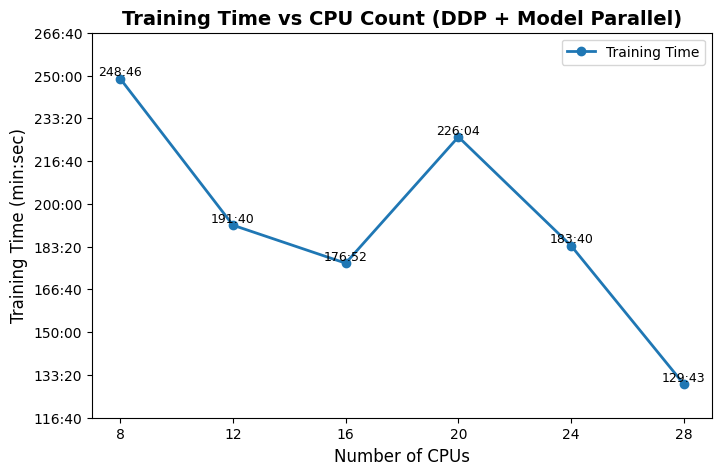

In [6]:
import matplotlib.pyplot as plt

# Convert seconds to minutes:seconds format for y-axis and annotations
def seconds_to_min_sec(seconds):
    return f"{int(seconds // 60)}:{int(seconds % 60):02d}"

df_mp['Training Time (min:sec)'] = df_mp['Training Time (s)'].apply(seconds_to_min_sec)

# Plotting the data
plt.figure(figsize=(8, 5))  # Reduced image size
plt.plot(df_mp['CPU Count'], df_mp['Training Time (s)'], marker='o', linestyle='-', linewidth=2, markersize=6)

# Enhancing the appearance
plt.title('Training Time vs CPU Count (DDP + Model Parallel)', fontsize=14, fontweight='bold')
plt.xlabel('Number of CPUs', fontsize=12)
plt.ylabel('Training Time (min:sec)', fontsize=12)
plt.xticks(df_mp['CPU Count'], fontsize=10)

# Convert y-axis ticks to minutes:seconds format
y_ticks = plt.yticks()[0]  # Get the current y-tick positions
plt.yticks(y_ticks, [seconds_to_min_sec(tick) for tick in y_ticks], fontsize=10)

# Annotating data points with minutes:seconds format
for x, y, label in zip(df_mp['CPU Count'], df_mp['Training Time (s)'], df_mp['Training Time (min:sec)']):
    plt.text(x, y, label, fontsize=9, ha='center', va='bottom')

# Adding a legend
plt.legend(['Training Time'], loc='upper right', fontsize=10)

# Save and show the plot with y-axis in min:sec
plt.show()


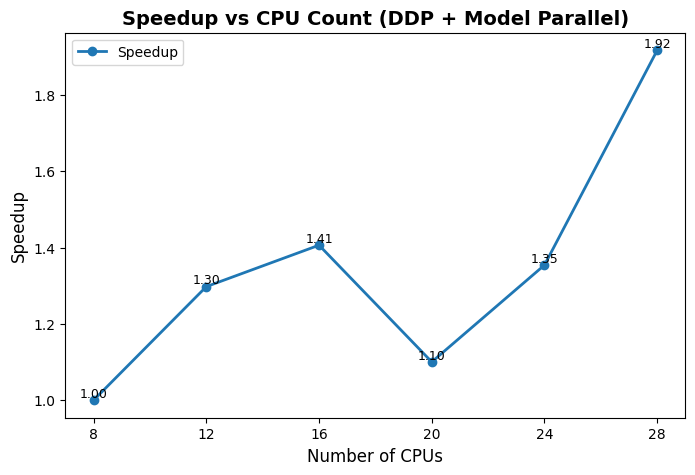

In [7]:
# Baseline training time for 8 CPUs (adjust if needed for your baseline CPU count)
baseline_time_mp = df_mp.loc[df_mp['CPU Count'] == 8, 'Training Time (s)'].values[0]

# Calculating speedup and efficiency
df_mp['Speedup'] = baseline_time_mp / df_mp['Training Time (s)']
df_mp['Efficiency'] = df_mp['Speedup'] / df_mp['CPU Count']

# Plotting Speedup for DDP + Model Parallel
plt.figure(figsize=(8, 5))  # Reduced image size
plt.plot(df_mp['CPU Count'], df_mp['Speedup'], marker='o', linestyle='-', linewidth=2, markersize=6)

plt.title('Speedup vs CPU Count (DDP + Model Parallel)', fontsize=14, fontweight='bold')
plt.xlabel('Number of CPUs', fontsize=12)
plt.ylabel('Speedup', fontsize=12)
plt.xticks(df_mp['CPU Count'], fontsize=10)
plt.yticks(fontsize=10)

# Annotating Speedup
for x, y in zip(df_mp['CPU Count'], df_mp['Speedup']):
    plt.text(x, y, f"{y:.2f}", fontsize=9, ha='center', va='bottom')

plt.legend(['Speedup'], loc='upper left', fontsize=10)
plt.show()

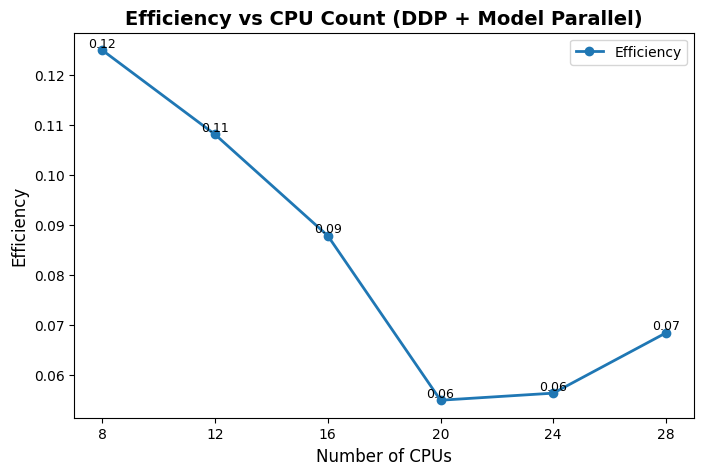

In [8]:
# Plotting Efficiency for DDP + Model Parallel
plt.figure(figsize=(8, 5))  # Reduced image size
plt.plot(df_mp['CPU Count'], df_mp['Efficiency'], marker='o', linestyle='-', linewidth=2, markersize=6)

plt.title('Efficiency vs CPU Count (DDP + Model Parallel)', fontsize=14, fontweight='bold')
plt.xlabel('Number of CPUs', fontsize=12)
plt.ylabel('Efficiency', fontsize=12)
plt.xticks(df_mp['CPU Count'], fontsize=10)
plt.yticks(fontsize=10)

# Annotating Efficiency
for x, y in zip(df_mp['CPU Count'], df_mp['Efficiency']):
    plt.text(x, y, f"{y:.2f}", fontsize=9, ha='center', va='bottom')

plt.legend(['Efficiency'], loc='upper right', fontsize=10)
plt.show()

# Training Time vs CPU Count (DDP + AMP)

In [20]:
import os
import re
import pandas as pd

# List of file paths for DDP and Model Parallel training
file_paths_mp = [
    'data_parallel_and_AMP/logs/training_4CPUs_20241212_132727.log',
    'data_parallel_and_AMP/logs/training_8CPUs_20241212_142906.log',
    'data_parallel_and_AMP/logs/training_12CPUs_20241212_165014.log'
]

# Regex pattern to extract CPU count and training time in seconds
cpu_pattern = re.compile(r"World size: (\d+)")
time_pattern = re.compile(r"Time Taken for Training: .*?([\d.]+) seconds")

# Extract data from log files
data_mp = []
for file_path in file_paths_mp:
    try:
        with open(file_path, 'r') as file:
            content = file.read()
            # Extract CPU count
            cpu_match = cpu_pattern.search(content)
            cpu_count = int(cpu_match.group(1)) if cpu_match else None
            # Extract training time
            time_match = time_pattern.search(content)
            training_time = float(time_match.group(1)) if time_match else None
            # Append to data if both metrics are found
            if cpu_count and training_time:
                data_mp.append({'CPU Count': cpu_count, 'Training Time (s)': training_time})
    except FileNotFoundError:
        print(f"File not found: {file_path}")
    except Exception as e:
        print(f"Error processing {file_path}: {e}")

# Create a DataFrame from the extracted data
df_mp = pd.DataFrame(data_mp)

# Sort the DataFrame by CPU count for easier visualization
df_mp = df_mp.sort_values(by='CPU Count')

# Save the extracted data to a CSV file
df_mp.to_csv('dataset/output_ddp_AMP.csv', index=False)
print("Data successfully extracted and saved to output_ddp_model_parallel.csv")


Data successfully extracted and saved to output_ddp_model_parallel.csv


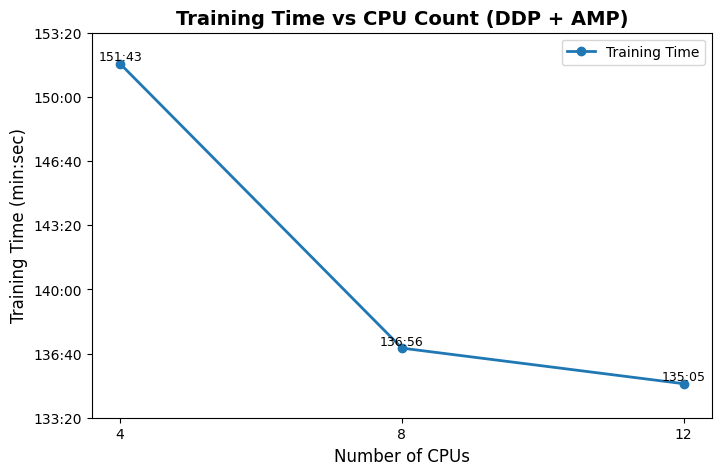

In [21]:
import matplotlib.pyplot as plt

# Convert seconds to minutes:seconds format for y-axis and annotations
def seconds_to_min_sec(seconds):
    return f"{int(seconds // 60)}:{int(seconds % 60):02d}"

df_mp['Training Time (min:sec)'] = df_mp['Training Time (s)'].apply(seconds_to_min_sec)

# Plotting the data
plt.figure(figsize=(8, 5))  # Reduced image size
plt.plot(df_mp['CPU Count'], df_mp['Training Time (s)'], marker='o', linestyle='-', linewidth=2, markersize=6)

# Enhancing the appearance
plt.title('Training Time vs CPU Count (DDP + AMP)', fontsize=14, fontweight='bold')
plt.xlabel('Number of CPUs', fontsize=12)
plt.ylabel('Training Time (min:sec)', fontsize=12)
plt.xticks(df_mp['CPU Count'], fontsize=10)

# Convert y-axis ticks to minutes:seconds format
y_ticks = plt.yticks()[0]  # Get the current y-tick positions
plt.yticks(y_ticks, [seconds_to_min_sec(tick) for tick in y_ticks], fontsize=10)

# Annotating data points with minutes:seconds format
for x, y, label in zip(df_mp['CPU Count'], df_mp['Training Time (s)'], df_mp['Training Time (min:sec)']):
    plt.text(x, y, label, fontsize=9, ha='center', va='bottom')

# Adding a legend
plt.legend(['Training Time'], loc='upper right', fontsize=10)

# Save and show the plot with y-axis in min:sec
plt.show()


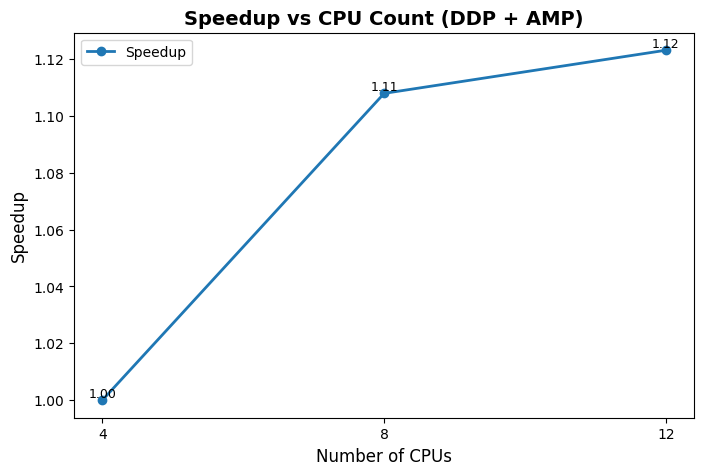

In [25]:
# Baseline training time for 8 CPUs (adjust if needed for your baseline CPU count)
baseline_time_mp = df_mp.loc[df_mp['CPU Count'] == 4, 'Training Time (s)'].values[0]

# Calculating speedup and efficiency
df_mp['Speedup'] = baseline_time_mp / df_mp['Training Time (s)']
df_mp['Efficiency'] = df_mp['Speedup'] / df_mp['CPU Count']

# Plotting Speedup for DDP + Model Parallel
plt.figure(figsize=(8, 5))  # Reduced image size
plt.plot(df_mp['CPU Count'], df_mp['Speedup'], marker='o', linestyle='-', linewidth=2, markersize=6)

plt.title('Speedup vs CPU Count (DDP + AMP)', fontsize=14, fontweight='bold')
plt.xlabel('Number of CPUs', fontsize=12)
plt.ylabel('Speedup', fontsize=12)
plt.xticks(df_mp['CPU Count'], fontsize=10)
plt.yticks(fontsize=10)

# Annotating Speedup
for x, y in zip(df_mp['CPU Count'], df_mp['Speedup']):
    plt.text(x, y, f"{y:.2f}", fontsize=9, ha='center', va='bottom')

plt.legend(['Speedup'], loc='upper left', fontsize=10)
plt.show()

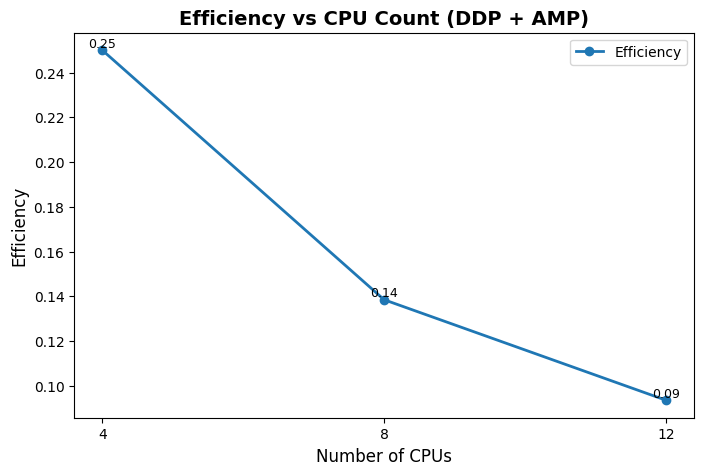

In [26]:
# Plotting Efficiency for DDP + Model Parallel
plt.figure(figsize=(8, 5))  # Reduced image size
plt.plot(df_mp['CPU Count'], df_mp['Efficiency'], marker='o', linestyle='-', linewidth=2, markersize=6)

plt.title('Efficiency vs CPU Count (DDP + AMP)', fontsize=14, fontweight='bold')
plt.xlabel('Number of CPUs', fontsize=12)
plt.ylabel('Efficiency', fontsize=12)
plt.xticks(df_mp['CPU Count'], fontsize=10)
plt.yticks(fontsize=10)

# Annotating Efficiency
for x, y in zip(df_mp['CPU Count'], df_mp['Efficiency']):
    plt.text(x, y, f"{y:.2f}", fontsize=9, ha='center', va='bottom')

plt.legend(['Efficiency'], loc='upper right', fontsize=10)
plt.show()

# Processing Time Comparison Between Dask and Pandas

This visualization compares the processing times for Dask and Pandas when handling the same workload. The comparison highlights the differences in performance between these two data processing libraries, with a clear focus on their efficiency.

## Key Insights:
1. **Dask**:
   - Dask demonstrates significantly faster processing times, completing the workload in approximately **32 seconds**.
   - Its parallelized architecture allows it to handle larger datasets and tasks efficiently.

2. **Pandas**:
   - Pandas takes approximately **79 seconds** for the same workload, reflecting its sequential nature of operation.
   - While Pandas is easy to use, it may become inefficient for processing large datasets.

## Chart Details:
- **X-axis**: Displays the two processing methods, Dask and Pandas.
- **Y-axis**: Represents the total processing time in seconds.
- **Bar Heights**: Indicate the processing time for each method, with Dask being considerably shorter than Pandas.

## Key Observations:
- **Performance Difference**: Dask is approximately **2.5x faster** than Pandas for the given task.
- **Scalability**: The results suggest that Dask is better suited for workloads that require parallel processing.

## Use Cases:
- **Dask**: Ideal for large-scale data processing, distributed computing, and tasks requiring scalability.
- **Pandas**: Suitable for small to medium datasets where simplicity and ease of use are priorities.

This chart clearly demonstrates the advantages of using Dask for tasks requiring optimized performance and scalability, making it a preferred choice for processing large datasets.


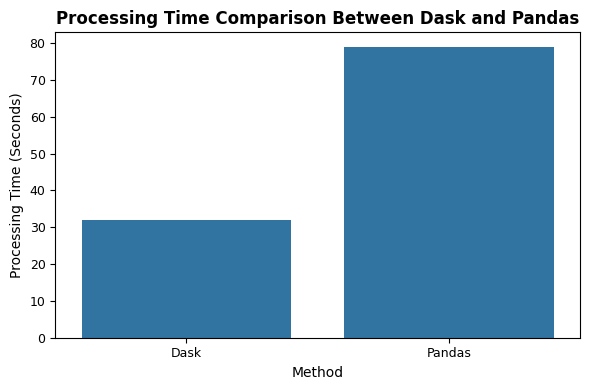

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create the DataFrame
timing_results_df = pd.DataFrame({
    "Run_ID": [1, 2],
    "Method": ["Dask", "Pandas"],
    "Processing_Time_Seconds": [31.730336, 79.268811]
})

# Round the Processing_Time_Seconds column to the nearest integer for cleaner visualization
timing_results_df["Processing_Time_Seconds"] = timing_results_df["Processing_Time_Seconds"].round().astype(int)

# Plotting the bar chart with reduced image size
plt.figure(figsize=(6, 4))  # Reduced size
sns.barplot(x="Method", y="Processing_Time_Seconds", data=timing_results_df)
plt.title("Processing Time Comparison Between Dask and Pandas", fontsize=12, fontweight='bold')
plt.xlabel("Method", fontsize=10)
plt.ylabel("Processing Time (Seconds)", fontsize=10)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)

# Remove grid lines
plt.grid(False)

plt.tight_layout()
plt.show()
